# Exercício 01 - PEL201

## Exercício
Implemente o algoritmo de Máximo Divisor Comum (MDC) de dois números (a e b) de dois modos: usando a solução iterativa (que percorre as possibilidades) e a solução recursiva.

### Pequeno texto sobre o que é e como encontrar, computacionalmente, o MDC
O Máximo Divisor Comum é o maior número que divide dois inteiros em questão. Para encontrá-lo computacionalmente existem duas possbilidades:

1. Utilizando um algoritmo iterativo que irá percorrer todas as opções até encontrar a melhor.

    * Neste cenário é importante compreender que a maioria dos testes resultarão em falha, principalmente se estivermos avaliando números primos. Ou seja, este algoritmo passa a ser pouco eficiente quanto maior forem os números sendo avaliados;


2. A segunda opção é se utilizar de um algoritmo criado por Euclides, aproximadamente em 300 a.C..

    * Este algoritmo consiste em subtrair o menor número do maior sucessivamente até chegar em zero. Quando esta convergência ocorrer o MDC será o outro número inteiro. Desta forma podemos calcular o MDC recursivamente utilizando o resto da divisão como entrada para a função até que o resto seja igual a 0.

In [1]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_random_primes():
    f = open("./top_primes.txt", "r")
    first_half = []
    second_half = []
    i = 0
    for prime in f:
        if i < 50000:
            first_half.append(int(prime.replace("\n", "")))
        else:
            second_half.append(int(prime.replace("\n", "")))

        i = i + 1

    pairs = zip(first_half, second_half)

    return pairs

### Explique, em palavras, como é a solução iterativa (e depois apresente o código, identificando qual linguagem usou)
Linguagem: `Python`

O algoritmo iterativo inicia definindo o menor número dentre as duas entradas como primeiro candidato. Após isso, iremos iterar entre todos os números até que o resto da divisão seja zero. Neste caso iremos repetir esta avaliação, no melhor caso `1` vez (isso se o `min(m, n)` for exatamente o MDC) e no pior caso `min(m, n)`.
Desta forma o número de iterações irá crescer proporcionalmente ao tamanho das entradas.

In [3]:
def mdc_iterativo(m=15485863, n=15485857):
    candidato = min(m, n)

    while m % candidato != 0 or n % candidato != 0:
        candidato = candidato - 1

    return candidato

### Explique, em palavras, como é a solução recursiva (e depois apresente o código, identificando qual linguagem usou)
Linguagem: `Python`

Este é o algoritmo de Euclides para encontrar o MDC de dois números inteiros. Como este algoritmo é recursivo, a primeira avaliação é feita para garantir o critério de parada. Isto feito realizamos uma nova chamada à função porém utilizando o resto da divisão como entrada para o segundo parâmetro. Isso será realizado até que a função atinja o critério de parada que é quando o resto da divisão for igual a 0.

Utilizando-se deste algoritmo, a quantidade de execuções nunca será maior do que 5 vezes o tamanho de dígitos do menor número.

In [4]:
def mdc_recursivo(m=15485863, n=15485857):
    if n == 0:
        return m

    return mdc_recursivo(n, m % n)

In [5]:
items = read_random_primes()
items = list(items)

In [6]:
iter_runtime_result = []
for item in tqdm(items):
    mdc_iter_start = time.time()
    mdc_iter_result = mdc_iterativo(item[0], item[1])
    mdc_iter_end = time.time()
    iter_runtime_result.append(mdc_iter_end - mdc_iter_start)

100%|██████████| 50000/50000 [1:09:27<00:00, 12.00it/s]


In [7]:
recur_runtime_result = []
for item in tqdm(items):
    mdc_recur_start = time.time()
    mdc_recur_result = mdc_recursivo(item[0], item[1])
    mdc_recur_end = time.time()
    recur_runtime_result.append(mdc_recur_end - mdc_recur_start)

100%|██████████| 50000/50000 [00:00<00:00, 85873.26it/s]


### Faça uma comparação em gráfico e tabela dos desempenhos de tempo (em segundos) entre elas para várias entradas iguais (faça entradas com números grandes e/ou rode o mesmo algoritmo várias vezes para capturar o tempo)

Utilizei um dataset com os primeiros 100 mil de números primos. Com esta lista montei 50.000 pares e utilizei como dados de teste.

Cada um dos 50.000 pares foram testados com o método iterativo e com o método recursivo.

#### Resultados

Antes de apresentar os resultados dos testes é importante fazer a avaliação conceitual de ambos os algoritmos para compreender a diferença na eficiência.

Vamos comparar os algoritmos utilizando como entrada os seguintes números primos: `m=15485863` e `n=15485857`

* Utilizando o algoritmo iterativo teremos, no pior caso, `15.485.857` iterações;

* Utilizando o algoritmo recursivo teremos, no pior caso, `5 * 8 = 40`. Ou seja, 5 vezes os 8 digitos do menor número, resultando em 40 passos.

Algoritmo Iterativo: `100%|██████████| 50000/50000 [1:09:27<00:00, 12.00it/s]`

Algoritmo Recursivo: `100%|██████████| 50000/50000 [00:00<00:00, 85873.26it/s]`

Ao realizar o teste foi possível perceber que o método iterativo é 99,98% mais lento que o método recursivo. Podemos perceber esta diferença através do gráfico abaixo, onde a curva de tempo de execução do método iterativo se aproxima de uma função linear enquanto a curva de tempo de execução do método recursivo se aproxima de uma curva constante, sendo assim muito mais eficiente do que o anterior.

In [32]:
print("Média - Tempo Algoritmo Iterativo (s): " + str(np.average(iter_runtime_result)))
print("Média - Tempo Algoritmo Recursivo (s): " + str(np.average(recur_runtime_result)))

Média - Tempo Algoritmo Iterativo (s): 0.08187464720726013
Média - Tempo Algoritmo Recursivo (s): 8.782563209533691e-06


In [31]:
((np.average(iter_runtime_result) - np.average(recur_runtime_result)) / np.average(iter_runtime_result)) * 100

99.98927315901918

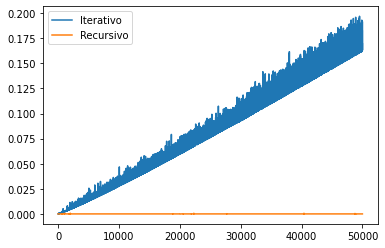

In [8]:
fig, ax = plt.subplots()

line1, = ax.plot(iter_runtime_result, label='Iterativo')

line2, = ax.plot(recur_runtime_result, label='Recursivo')

ax.legend()
plt.show()

### Apresente e EXPLIQUE a recorrência T(n) de cada um dos algoritmos implementados

#### Algoritmo Iterativo

```python
def mdc_iterativo(m=15485863, n=15485857):
    candidato = min(m, n)

    while m / candidato != 0 or n / candidato != 0:
        candidato = candidato - 1

    return candidato
```

Linha 1: `candidado = min(m, n)` => C * 1

Linha 2: `while m % candidato != 0 or n % candidato != 0:` => C * n + 1

Linha 3: `candidado = candidado - 1` => C * n

Linha 4: `return candidato` => C * 1

Resultado: $$T(n) = 4c + 2n + 1$$

Assumindo `c = 1`, temos: $$T(n) = 2n + 5$$


#### Algoritmo Recursivo

```python
def mdc_recursivo(m=15485863, n=15485857):
    if n == 0:
        return m

    return mdc_recursivo(n, m % n)
```

Linha 1: `if n == 0` => C * 1

Linha 2: `return m` => C * 1

Linha 3: `return mdc_recursivo(n, m % n)` => $$T(m / n) + \theta$$

Logo a recorrência deste algoritmo é:

$$ \theta(1) $$

$$ T(m / n) + \theta(1)$$